<a href="https://colab.research.google.com/github/ali3brt/-Ali3brt-s-Machine-Learning-and-Deep-Learning-Projects/blob/main/02_class_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 55.9 MB/s eta 0:00:00


In [2]:
import os
from torchvision import datasets, transforms
from torch.utils.data import Subset
from PIL import Image

# Define paths for YOLO dataset
output_dir = "/content/mnist_yolo"
train_images_path = os.path.join(output_dir, "train/images")
train_labels_path = os.path.join(output_dir, "train/labels")
val_images_path = os.path.join(output_dir, "val/images")
val_labels_path = os.path.join(output_dir, "val/labels")

# Create the necessary directories
os.makedirs(train_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to YOLO-compatible dimensions
    transforms.ToTensor()
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root="data", train=True, transform=transform, download=True)
val_dataset = datasets.MNIST(root="data", train=False, transform=transform, download=True)

# Slice the dataset (e.g., 1000 training images and 200 validation images)
train_subset = Subset(train_dataset, list(range(1000)))  # First 1,000 images
val_subset = Subset(val_dataset, list(range(200)))  # First 200 images

# Helper function to save images and labels in YOLO format
def save_dataset(dataset, images_path, labels_path):
    for idx, (image, label) in enumerate(dataset):
        # Save image
        image_path = os.path.join(images_path, f"{idx}.png")
        image = transforms.ToPILImage()(image)
        image.save(image_path)

        # Save label
        label_path = os.path.join(labels_path, f"{idx}.txt")
        with open(label_path, "w") as f:
            # YOLO format: <class_id> <x_center> <y_center> <width> <height>
            # Since it's a classification task, bbox covers the entire image
            f.write(f"{label} 0.5 0.5 1.0 1.0\n")

# Save the subsets
save_dataset(train_subset, train_images_path, train_labels_path)
save_dataset(val_subset, val_images_path, val_labels_path)

print("MNIST subset successfully converted to YOLO format!")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:10<00:00, 908kB/s] 


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.68MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

MNIST subset successfully converted to YOLO format!


In [3]:
from collections import Counter

# Load the MNIST dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

# Load training and validation datasets
train_dataset = datasets.MNIST(root="data", train=True, transform=ToTensor(), download=True)
val_dataset = datasets.MNIST(root="data", train=False, transform=ToTensor(), download=True)

# Count class occurrences
train_classes = [label for _, label in train_dataset]
val_classes = [label for _, label in val_dataset]

train_class_counts = Counter(train_classes)
val_class_counts = Counter(val_classes)

# Display class counts
print("Class Distribution in Training Set:")
for class_id, count in train_class_counts.items():
    print(f"Class {class_id}: {count} images")

print("\nClass Distribution in Validation Set:")
for class_id, count in val_class_counts.items():
    print(f"Class {class_id}: {count} images")


Class Distribution in Training Set:
Class 5: 5421 images
Class 0: 5923 images
Class 4: 5842 images
Class 1: 6742 images
Class 9: 5949 images
Class 2: 5958 images
Class 3: 6131 images
Class 6: 5918 images
Class 7: 6265 images
Class 8: 5851 images

Class Distribution in Validation Set:
Class 7: 1028 images
Class 2: 1032 images
Class 1: 1135 images
Class 0: 980 images
Class 4: 982 images
Class 9: 1009 images
Class 5: 892 images
Class 6: 958 images
Class 3: 1010 images
Class 8: 974 images


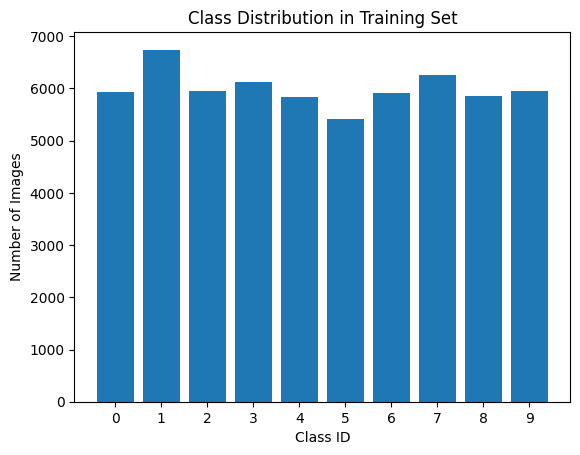

In [4]:
import matplotlib.pyplot as plt

# Ensure all class IDs (0-9) are included
all_classes = list(range(10))  # Assuming 10 classes (0–9)

# Get counts for all classes, filling missing classes with 0
train_class_counts_full = [train_class_counts.get(cls, 0) for cls in all_classes]

# Plot the class distribution
plt.bar(all_classes, train_class_counts_full)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.xticks(all_classes)  # Ensure all class IDs are shown on the x-axis
plt.show()


In [5]:
#Manual



# Lets say for some reason you need to manually create a balance chart
- Class 5: 5421 images
- Class 0: 5923 images
- Class 4: 5842 images
- Class 1: 6742 images
- Class 9: 5949 images
- Class 2: 5958 images
- Class 3: 6131 images
- Class 6: 5918 images
- Class 7: 6265 images
- Class 8: 5851 images

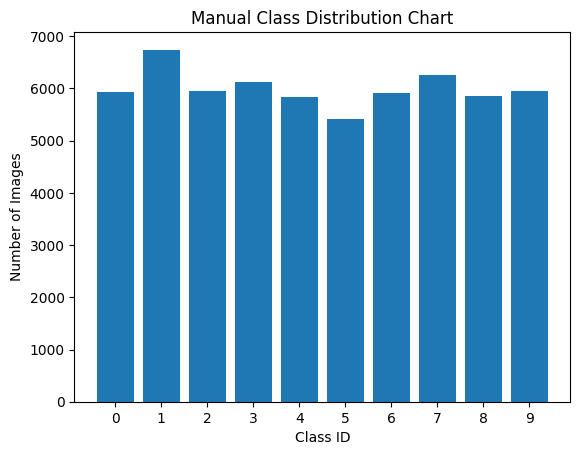

In [6]:
class_distribution = [
    (5, 5421),
    (0, 5923),
    (4, 5842),
    (1, 6742),
    (9, 5949),
    (2, 5958),
    (3, 6131),
    (6, 5918),
    (7, 6265),
    (8, 5851)
]

# Separate the class IDs and image counts
class_ids = []
image_counts = []

for item in class_distribution:
    class_ids.append(item[0])      # Append Class ID
    image_counts.append(item[1])  # Append Number of Images

# Plot the class distribution
plt.bar(class_ids, image_counts)
plt.title("Manual Class Distribution Chart")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.xticks(class_ids)  # Ensure all class IDs are shown
plt.show()

---

In [7]:
# Define the YAML content
mnist_yaml_content = """
path: mnist_yolo
train:  /content/mnist_yolo/train/images
val: /content/mnist_yolo/val/images
nc: 10
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
"""

# Write the YAML file
with open("mnist.yaml", "w") as yaml_file:
    yaml_file.write(mnist_yaml_content)

print("mnist.yaml file created successfully!")



mnist.yaml file created successfully!


In [8]:

#If you want to run you can
# from ultralytics import YOLO

#model = YOLO('yolo11n.yaml')  # Choose a small model for faster training
#model.train(data='mnist.yaml', epochs=5, imgsz=64, batch=16)


In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="your_api_key_here")
project = rf.workspace("roboflow-100").project("poker-cards-cxcvz")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to poker-cards-2 in yolov11:: 100%|██████████| 2582/2582 [00:00<00:00, 4554.87it/s]


In [12]:
dir(dataset)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'location',
 'model_format',
 'name',
 'version']

In [13]:
dataset.location

'/content/poker-cards-2'

Class Distribution in Training Set: Counter({36: 90, 2: 90, 44: 90, 48: 90, 40: 90, 6: 90, 10: 90, 14: 90, 52: 89, 38: 85, 4: 85, 8: 85, 12: 85, 34: 83, 0: 83, 50: 83, 46: 83, 42: 82, 18: 81, 24: 81, 28: 81, 32: 81, 16: 79, 22: 79, 26: 79, 30: 79, 37: 78, 3: 78, 7: 78, 11: 78, 33: 78, 20: 78, 41: 78, 49: 78, 45: 78, 15: 75, 21: 75, 25: 75, 29: 75, 35: 75, 1: 75, 43: 75, 51: 75, 47: 75, 39: 75, 5: 75, 9: 75, 13: 75, 17: 75, 27: 75, 23: 75, 31: 75, 19: 1})
Class Distribution in Validation Set: Counter({36: 18, 2: 18, 44: 18, 52: 18, 48: 18, 40: 18, 6: 18, 10: 18, 14: 18, 34: 17, 0: 17, 42: 17, 50: 17, 46: 17, 38: 17, 4: 17, 8: 17, 12: 17, 18: 16, 24: 16, 28: 16, 32: 16, 37: 16, 3: 16, 7: 16, 11: 16, 33: 16, 20: 16, 41: 16, 49: 16, 45: 16, 31: 15, 23: 15, 17: 15, 27: 15, 16: 15, 22: 15, 26: 15, 30: 15, 15: 15, 21: 15, 25: 15, 29: 15, 39: 15, 9: 15, 13: 15, 5: 15, 35: 15, 1: 15, 43: 15, 51: 15, 47: 15})
Total Class Distribution: Counter({36: 108, 2: 108, 44: 108, 48: 108, 40: 108, 6: 108, 

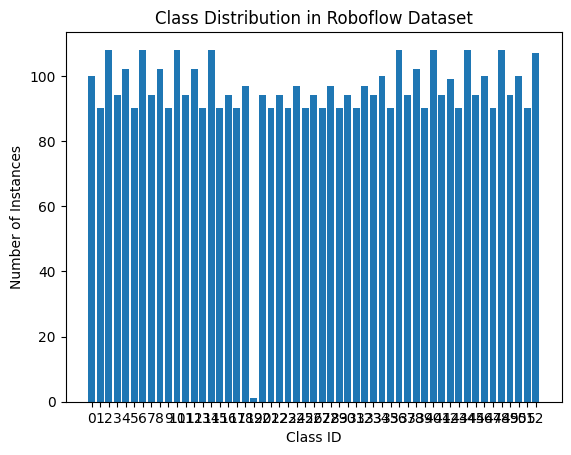

In [14]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Path to the Roboflow dataset's label directories
train_labels_path = f"{dataset.location}/train/labels"
val_labels_path = f"{dataset.location}/valid/labels"

# Function to count class occurrences from YOLO label files
def count_classes(labels_path):
    class_counts = Counter()
    for label_file in os.listdir(labels_path):
        with open(os.path.join(labels_path, label_file), "r") as f:
            for line in f:
                class_id = int(line.split()[0])  # Class ID is the first value in each line
                class_counts[class_id] += 1
    return class_counts

# Count classes in training and validation sets
train_class_counts = count_classes(train_labels_path)
val_class_counts = count_classes(val_labels_path)

# Combine counts for a complete overview (optional)
total_class_counts = train_class_counts + val_class_counts

# Print the counts
print("Class Distribution in Training Set:", train_class_counts)
print("Class Distribution in Validation Set:", val_class_counts)
print("Total Class Distribution:", total_class_counts)

# Visualize the class balance (Total Counts)
class_ids = list(total_class_counts.keys())
image_counts = list(total_class_counts.values())

plt.bar(class_ids, image_counts)
plt.title("Class Distribution in Roboflow Dataset")
plt.xlabel("Class ID")
plt.ylabel("Number of Instances")
plt.xticks(class_ids)  # Ensure all class IDs are shown
plt.show()


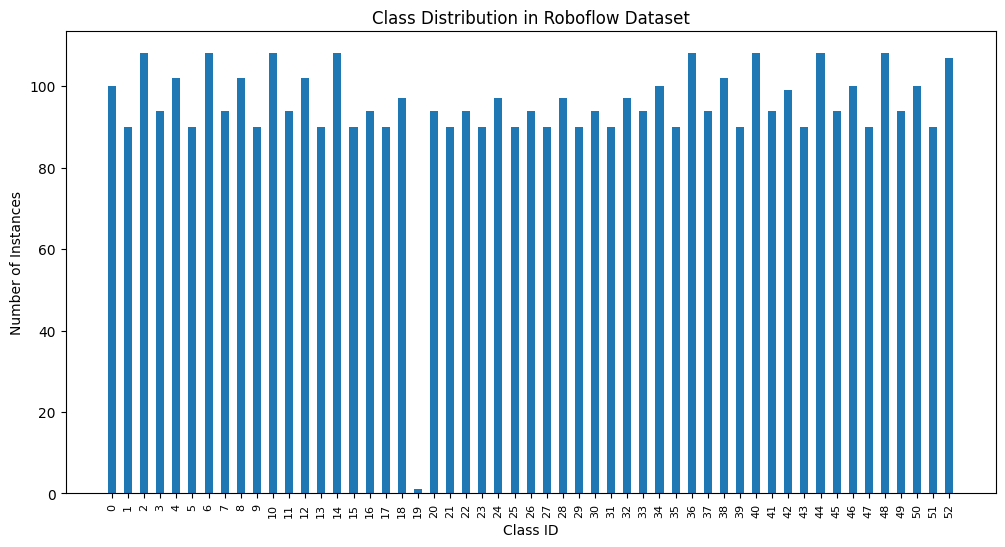

In [15]:
plt.figure(figsize=(12, 6))  # Increase width and height

plt.bar(class_ids, image_counts, width=0.5)  # Adjust the bar width
plt.title("Class Distribution in Roboflow Dataset")
plt.xlabel("Class ID")
plt.ylabel("Number of Instances")
plt.xticks(rotation=90, fontsize=8)  # Rotate and shrink tick labels

plt.xticks(class_ids)  # Ensure all class IDs are shown
plt.show()

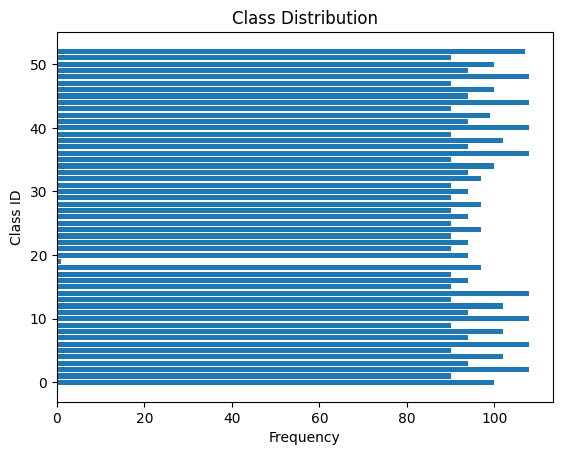

In [16]:
plt.barh(class_ids, image_counts)
plt.xlabel("Frequency")
plt.ylabel("Class ID")
plt.title("Class Distribution")
plt.show()


Grouped by Count:
Count: 94, Classes: [37, 3, 7, 11, 33, 20, 41, 49, 45, 16, 22, 26, 30]
Count: 90, Classes: [15, 21, 25, 29, 35, 1, 43, 51, 47, 39, 5, 9, 13, 17, 27, 23, 31]
Count: 102, Classes: [38, 4, 8, 12]
Count: 108, Classes: [36, 2, 44, 48, 40, 6, 10, 14]
Count: 97, Classes: [18, 24, 28, 32]
Count: 100, Classes: [34, 0, 50, 46]
Count: 99, Classes: [42]
Count: 107, Classes: [52]
Count: 1, Classes: [19]


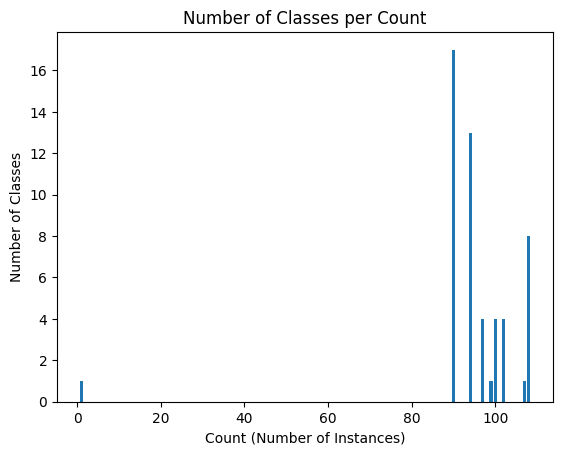

In [17]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Paths to the dataset's label directories
train_labels_path = f"{dataset.location}/train/labels"
val_labels_path = f"{dataset.location}/valid/labels"

def count_classes(labels_path):
    class_counts = Counter()
    if not os.path.exists(labels_path):
        print(f"Path {labels_path} does not exist!")
        return class_counts
    label_files = os.listdir(labels_path)
    if not label_files:
        print(f"No label files found in {labels_path}")
        return class_counts
    for label_file in label_files:
        with open(os.path.join(labels_path, label_file), "r") as f:
            for line in f:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1
    return class_counts

# Count classes in training and validation sets
train_class_counts = count_classes(train_labels_path)
val_class_counts = count_classes(val_labels_path)
total_class_counts = train_class_counts + val_class_counts

if not total_class_counts:
    print("No class counts found! Check your dataset paths or label files.")
    exit()

# Group classes by their counts
grouped_by_count = {}
for class_id, count in total_class_counts.items():
    if count not in grouped_by_count:
        grouped_by_count[count] = []
    grouped_by_count[count].append(class_id)

# Print the grouped dictionary
print("Grouped by Count:")
for count, classes in grouped_by_count.items():
    print(f"Count: {count}, Classes: {classes}")

# Visualize the distribution
unique_counts = list(grouped_by_count.keys())
num_classes_per_count = [len(classes) for classes in grouped_by_count.values()]

plt.bar(unique_counts, num_classes_per_count)
plt.title("Number of Classes per Count")
plt.xlabel("Count (Number of Instances)")
plt.ylabel("Number of Classes")
plt.show()


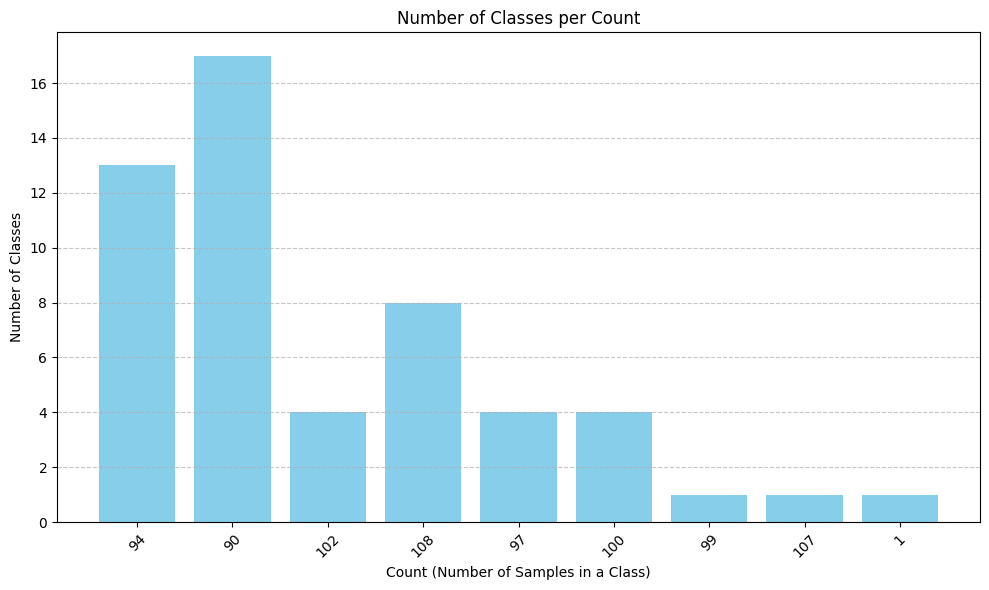

In [18]:
import matplotlib.pyplot as plt

# Data
counts = list(grouped_by_count.keys())  # The counts (x-axis)
num_classes = [len(classes) for classes in grouped_by_count.values()]  # Number of classes per count (y-axis)

# Convert counts to strings to force categorical treatment
counts_str = [str(count) for count in counts]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(counts_str, num_classes, color="skyblue", width=0.8)  # Treat x-axis as categorical
plt.title("Number of Classes per Count")
plt.xlabel("Count (Number of Samples in a Class)")
plt.ylabel("Number of Classes")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)  # Rotate for better readability if needed
plt.tight_layout()
plt.show()


In [19]:
from ultralytics import YOLO

# Load YOLO model
model = YOLO('yolov8n.yaml')  # YOLOv8n is the smallest model

# Train YOLO for 5 epochs
model.train(data="/content/poker-cards-2/data.yaml", epochs=10, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/poker-cards-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, 

100%|██████████| 755k/755k [00:00<00:00, 83.4MB/s]


Overriding model.yaml nc=80 with nc=53

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 249MB/s]


AMP: checks passed ✅


train: Scanning /content/poker-cards-2/train/labels... 964 images, 0 backgrounds, 0 corrupt: 100%|██████████| 964/964 [00:00<00:00, 1535.35it/s]

train: New cache created: /content/poker-cards-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/poker-cards-2/valid/labels... 193 images, 0 backgrounds, 0 corrupt: 100%|██████████| 193/193 [00:00<00:00, 1233.81it/s]

val: New cache created: /content/poker-cards-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000175, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.42G      2.537      5.461      4.334         18        640: 100%|██████████| 61/61 [00:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.57it/s]

                   all        193        838          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.3G      2.494      5.376      4.111         17        640: 100%|██████████| 61/61 [00:21<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]

                   all        193        838          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.31G      2.435      5.253      3.862         17        640: 100%|██████████| 61/61 [00:20<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        193        838    0.00625      0.174     0.0109    0.00365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.37G      2.408      5.061      3.623         17        640: 100%|██████████| 61/61 [00:20<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]


                   all        193        838      0.572      0.044      0.016    0.00503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.31G      2.334      4.885      3.422         19        640: 100%|██████████| 61/61 [00:19<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]


                   all        193        838    0.00787      0.379      0.023    0.00967

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.38G      2.303      4.692      3.294         17        640: 100%|██████████| 61/61 [00:20<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


                   all        193        838      0.254      0.103     0.0321     0.0138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.38G      2.263      4.556        3.2         17        640: 100%|██████████| 61/61 [00:20<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]


                   all        193        838      0.359     0.0648     0.0393     0.0171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.37G      2.234      4.427      3.119         19        640: 100%|██████████| 61/61 [00:19<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]


                   all        193        838      0.298     0.0629     0.0493     0.0227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.31G       2.21      4.352      3.074         17        640: 100%|██████████| 61/61 [00:19<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]


                   all        193        838      0.262      0.102     0.0602     0.0277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.38G      2.189      4.307       3.04         17        640: 100%|██████████| 61/61 [00:19<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]


                   all        193        838      0.257      0.084      0.061     0.0288

10 epochs completed in 0.070 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,015,983 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]


                   all        193        838      0.258     0.0848     0.0615     0.0291
           10 Diamonds         17         17     0.0411     0.0588     0.0604     0.0295
             10 Hearts         15         15          0          0     0.0127    0.00415
             10 Spades         18         18          0          0     0.0105    0.00262
           10 Trefoils         16         16      0.223      0.375      0.226      0.128
            2 Diamonds         17         17      0.143      0.176     0.0969     0.0489
              2 Hearts         15         15          0          0     0.0205    0.00838
              2 Spades         18         18     0.0899     0.0831     0.0659     0.0303
            2 Trefoils         16         16          0          0     0.0523     0.0268
            3 Diamonds         17         17      0.127      0.353      0.198      0.104
              3 Hearts         15         15          1          0          0          0
              3 Spade

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7d0973fc40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03303